In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import networkx as nx

# Implementation

In [13]:
class Rules:
    def __init__(self, rule_num: int, L=100):
        self.L = L
        self.switches = np.zeros((2,8))
        self.switches[0, :] = np.vectorize(np.binary_repr)(np.arange(0,8)[::-1], width=3).astype(int) #to binary and then that str to int
        self.set_rule(rule_num)
    
    def set_rule(self, rule_num):
        self.switches[1, :] = list(np.binary_repr(rule_num, width=8)) #assign given rule
        
    def fill_new_line(self, n):
        new_line =  np.convolve(np.pad(self.env[n, :][0], pad_width=1, mode='wrap').astype(int), #pad to make periodic boundary conditions
                                #kernel is defined this way to decode binary values
                                np.array([1,2,4]))[2:-2] #we cut two from both sides one is the corner case not taken at that point and the other comes from additioal cell from padding
        self.env[n[0]+1, :] = np.array(list(map(lambda x: self.switches[1, int(7 - x)], new_line)))
        #in last step we decode obtained values with the switches defined for this rule
        
    def sim(self, start_config, steps = 100):
        self.env = np.zeros((steps + 1, self.L))
        self.env[0, :] = start_config
        #we apply along the axis to update the env and make it faster than a for loop
        np.apply_along_axis(self.fill_new_line, -1, np.arange(0, steps).reshape(-1,1))

# Exemplary runs

In [14]:
start_config1 = np.zeros(100)
start_config1[49] = 1
print(start_config1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [15]:
r1 = Rules(rule_num=50)
r1.sim(start_config = start_config1)

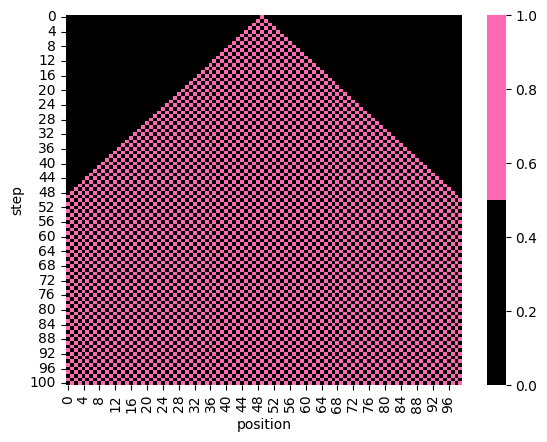

In [16]:
sns.heatmap(r1.env, cmap=['black', 'hotpink'])
plt.xlabel('position')
plt.ylabel('step')
plt.show()

In [17]:
start_config2 = np.append(np.full(50, 0), np.full(50, 1))
np.random.shuffle(start_config2)
print(start_config2)

[1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0]


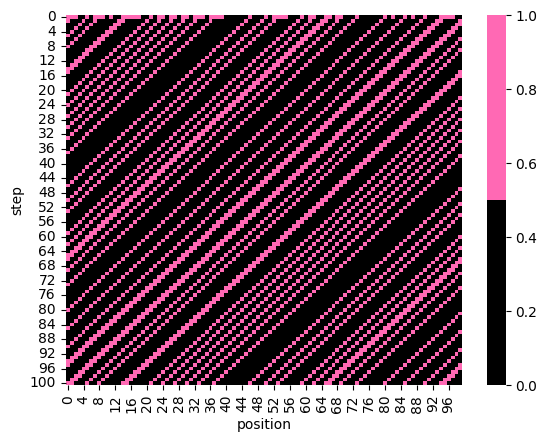

In [18]:
r2 = Rules(rule_num=10)
r2.sim(start_config = start_config2)

sns.heatmap(r2.env, cmap=['black', 'hotpink'])
plt.xlabel('position')
plt.ylabel('step')
plt.show()

# Rules

In [19]:
rules = [30, 36, 50, 57, 70, 77, 107, 110, 118, 201]

In [20]:
def gen_plots(rule):
    print(f'Rule {rule}')
    fig, axes = plt.subplots(2, 2, figsize = (12, 8))
    r_temp1 = Rules(rule_num=rule)
    r_temp1.sim(start_config = start_config1)
    sns.heatmap(r_temp1.env, cmap=['black', 'hotpink'], 
                ax = axes[0,0])
    axes[0,0].set_xlabel('Field')
    axes[0,0].set_ylabel('Number of $1$\'s')
    axes[0,0].set_title(f'Start with one dot')
    
    r_temp2 = Rules(rule_num=rule)
    r_temp2.sim(start_config = start_config2)
    sns.heatmap(r_temp2.env, cmap=['black', 'hotpink'], 
                ax = axes[0,1])
    axes[0,1].set_xlabel('Field')
    axes[0,1].set_ylabel('Number of $1$\'s')
    axes[0,1].set_title(f'Start with random configuration')
    
    axes[1,0].plot(r_temp1.env.sum(axis=1), color='orange', label='number of $1$\'s')
    temp = (r_temp1.env != np.roll(r_temp1.env, axis=0, shift=1)).sum(axis=1)[1:]
    axes[1,0].plot(range(1,101), temp, color='teal', label='activity')
    temp = (r_temp1.env != np.roll(r_temp1.env, axis=1, shift=1)).sum(axis=1)
    axes[1,0].plot(temp, color='hotpink', label='active bonds')
    axes[1,0].set_xlabel('Step')
    axes[1,0].set_ylabel('Value')
    axes[1,0].legend()
    
    axes[1,1].plot(r_temp2.env.sum(axis=1), color='orange', label='number of $1$\'s')
    temp = (r_temp2.env != np.roll(r_temp2.env, axis=0, shift=1)).sum(axis=1)[1:]
    axes[1,1].plot(range(1,101), temp, color='teal', label='activity')
    temp = (r_temp2.env != np.roll(r_temp2.env, axis=1, shift=1)).sum(axis=1)
    axes[1,1].plot(temp, color='hotpink', label='active bonds')
    axes[1,1].set_xlabel('Step')
    axes[1,1].set_ylabel('Value')
    axes[1,1].legend()
    
    plt.show()

Rule 30


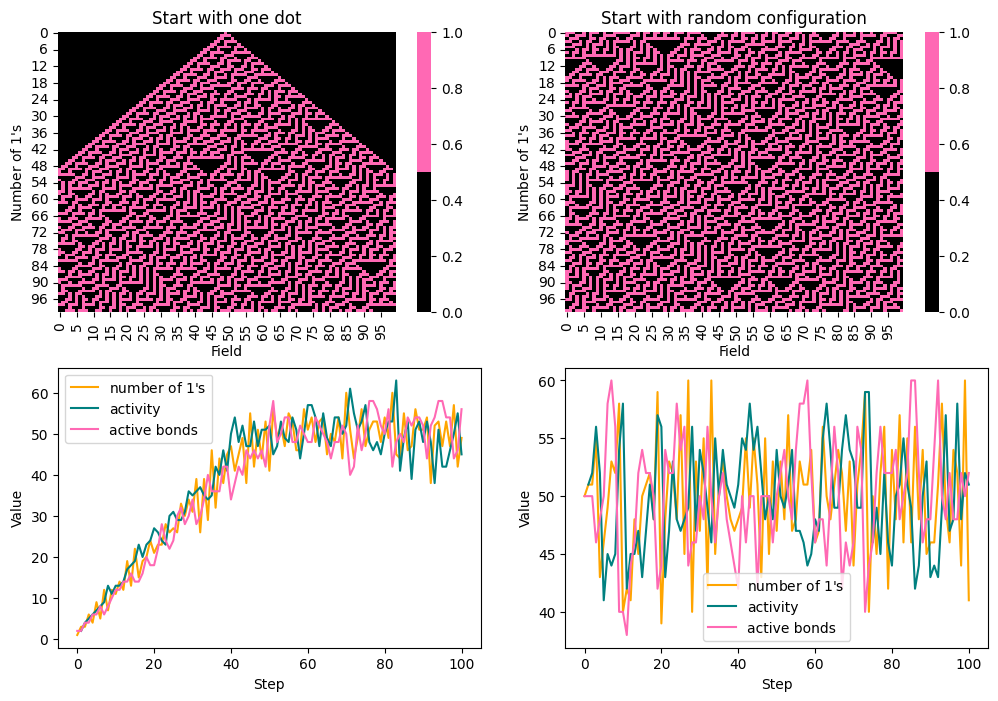

Rule 36


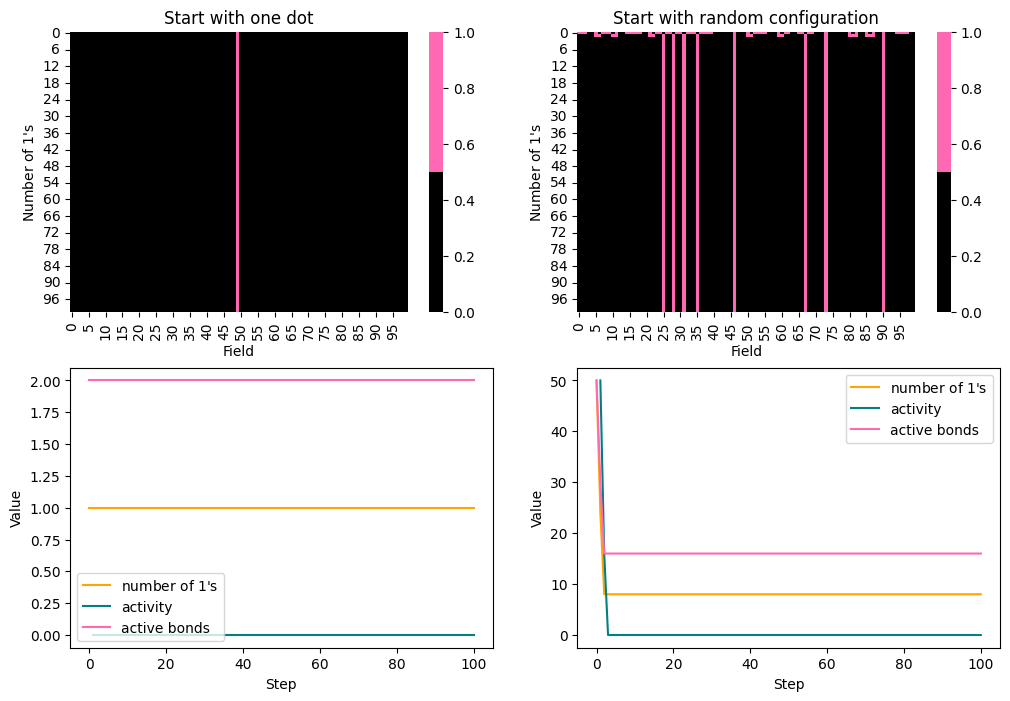

Rule 50


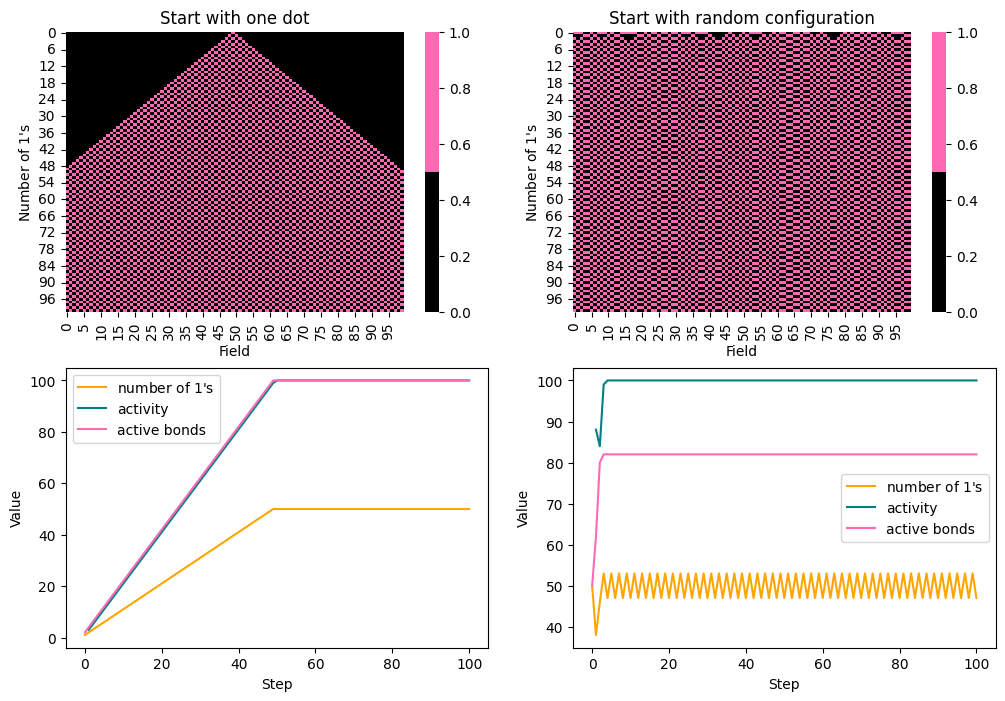

Rule 57


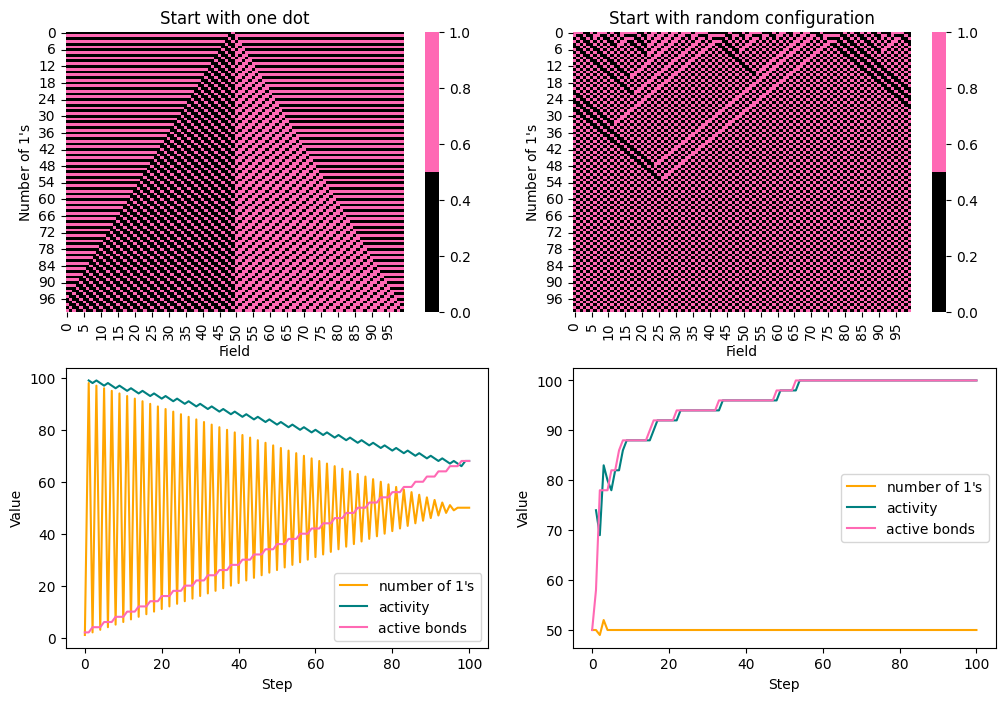

Rule 70


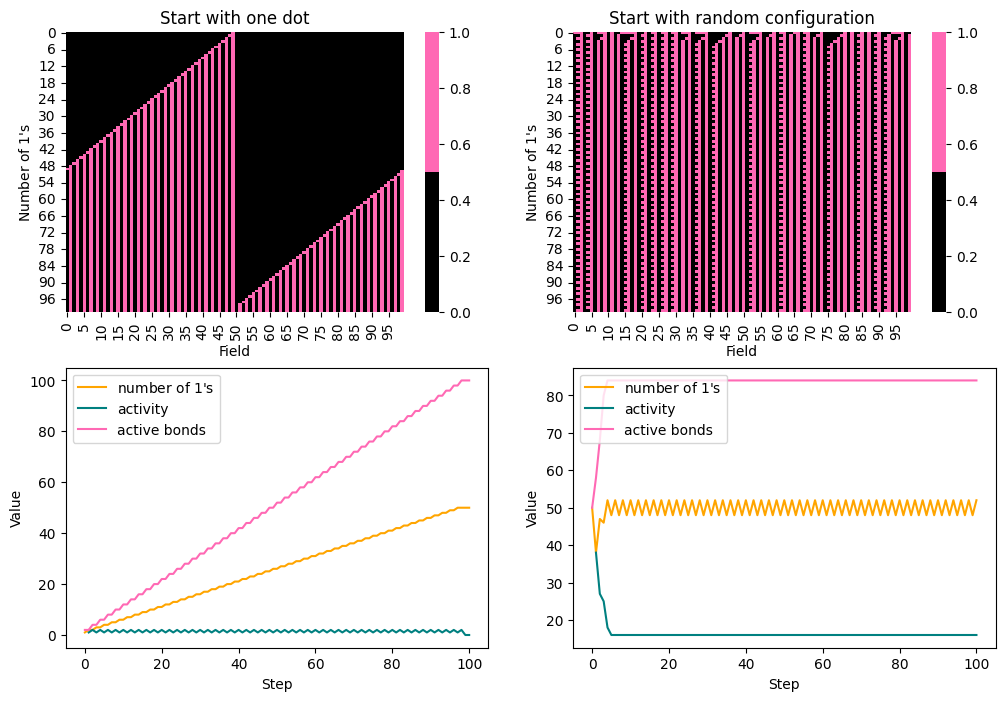

Rule 77


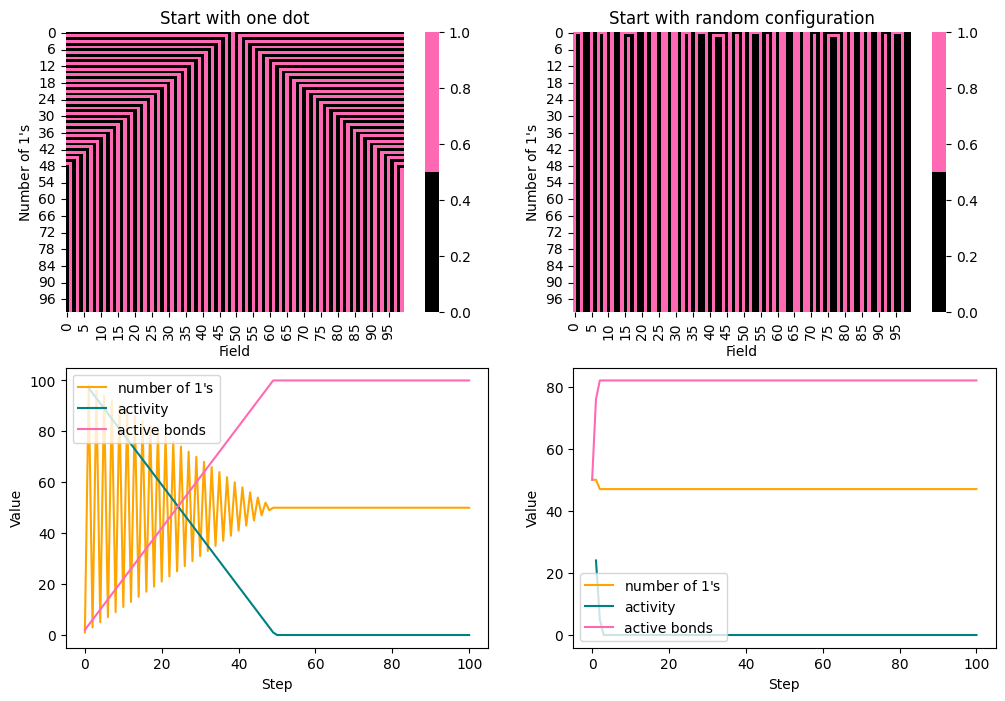

Rule 107


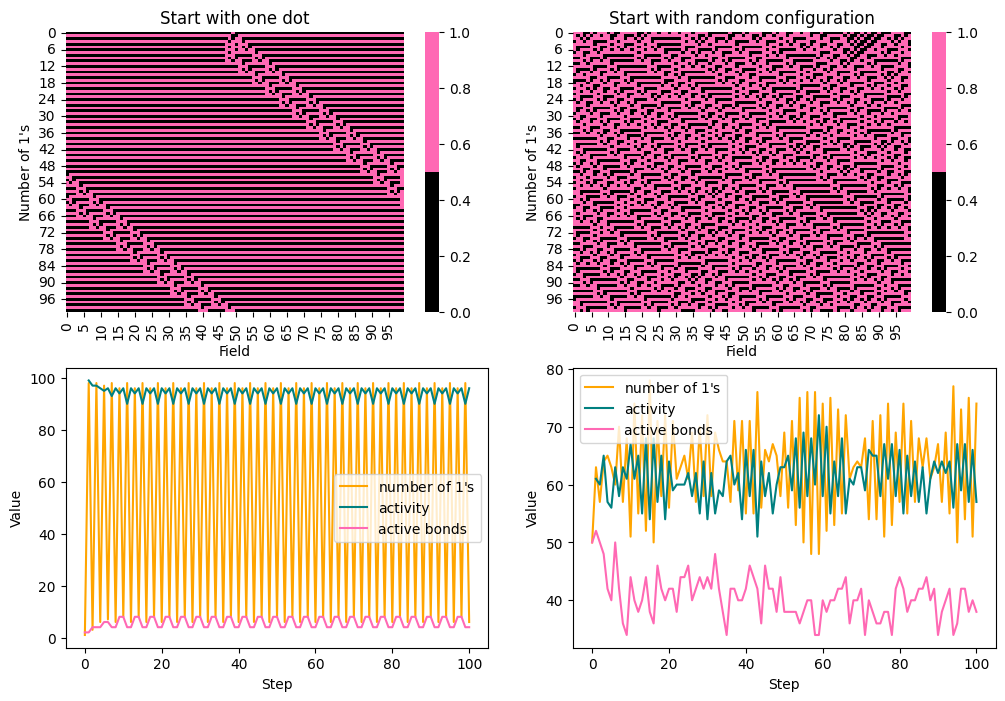

Rule 110


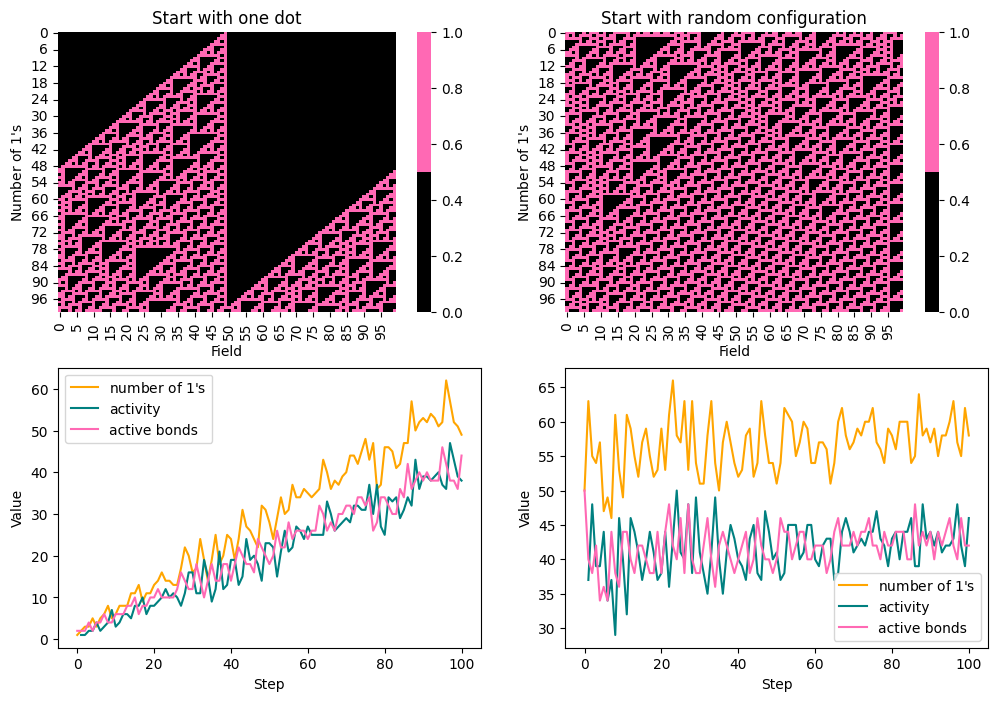

Rule 118


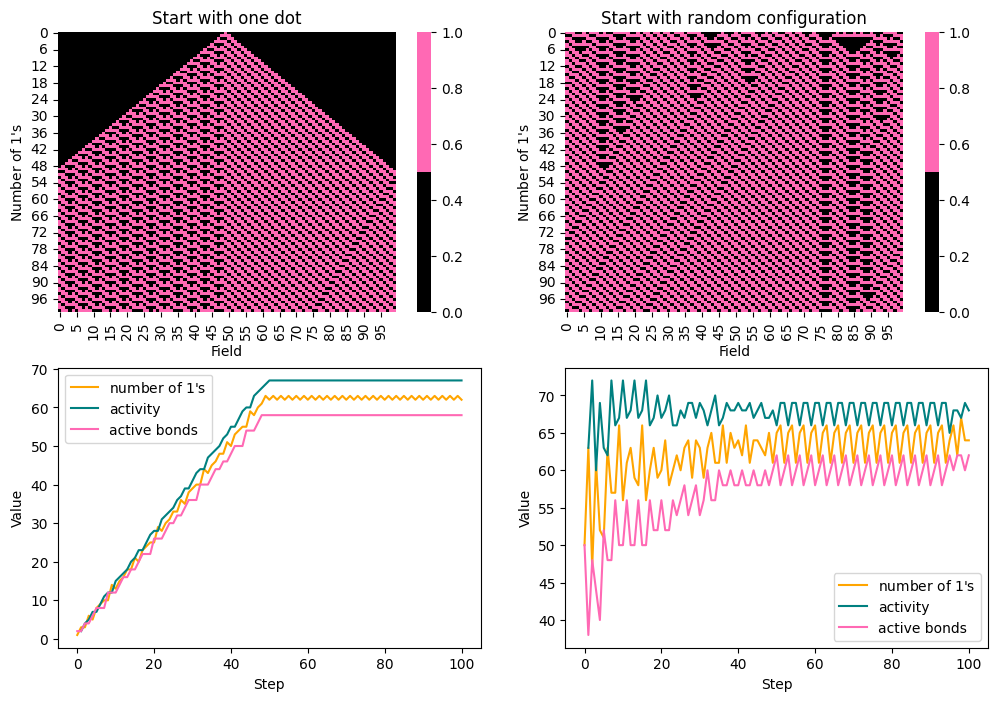

Rule 201


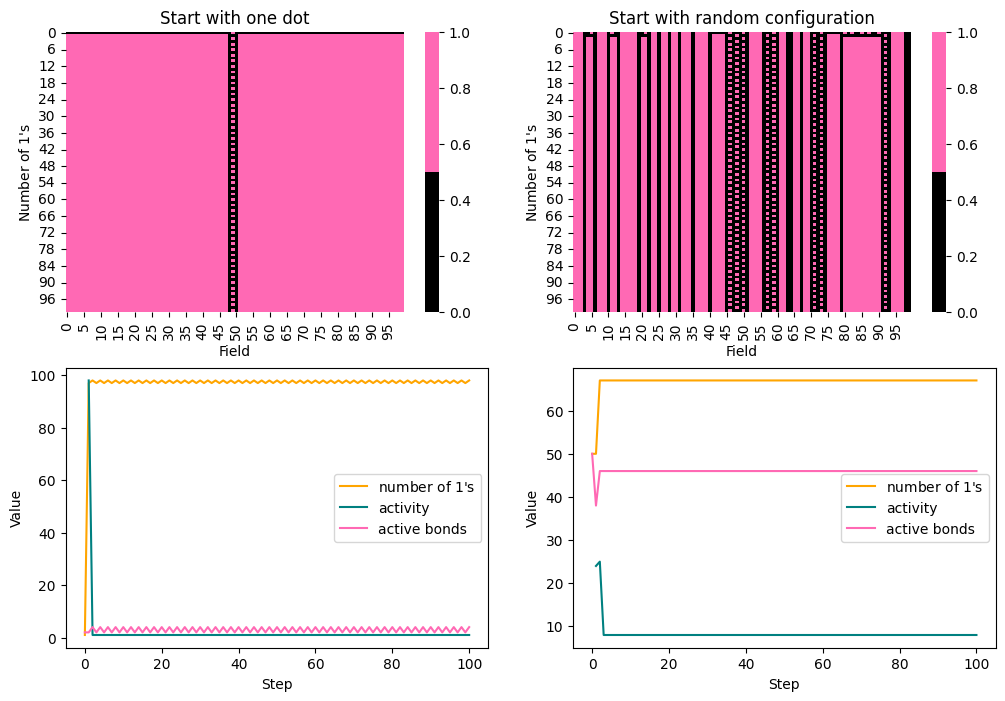

In [21]:
for rule in rules:
    gen_plots(rule)

In [37]:
def make_graph(rule:int):
    g1 = nx.DiGraph(directed=True)
    g1.add_nodes_from(range(256))
    for i in range(256):
        start = list(np.binary_repr(i, width=8))
        r_temp = Rules(rule_num=rule, L=8)
        r_temp.sim(start_config = start, steps=1)
        bin_val = r_temp.env[-1,:].copy()
        dec_val = int(np.round(bin_val.dot(2 ** np.arange(0,8)[::-1])))
        g1.add_edge(i, dec_val)
    plt.figure(figsize=(20,20))
    pos = nx.spring_layout(g1)
    nx.draw_networkx_nodes(g1, pos, node_color='hotpink')
    nx.draw_networkx_labels(g1, pos)
    nx.draw_networkx_edges(g1, pos, arrows=True)
    plt.title(f'Rule {rule}')
    plt.show()

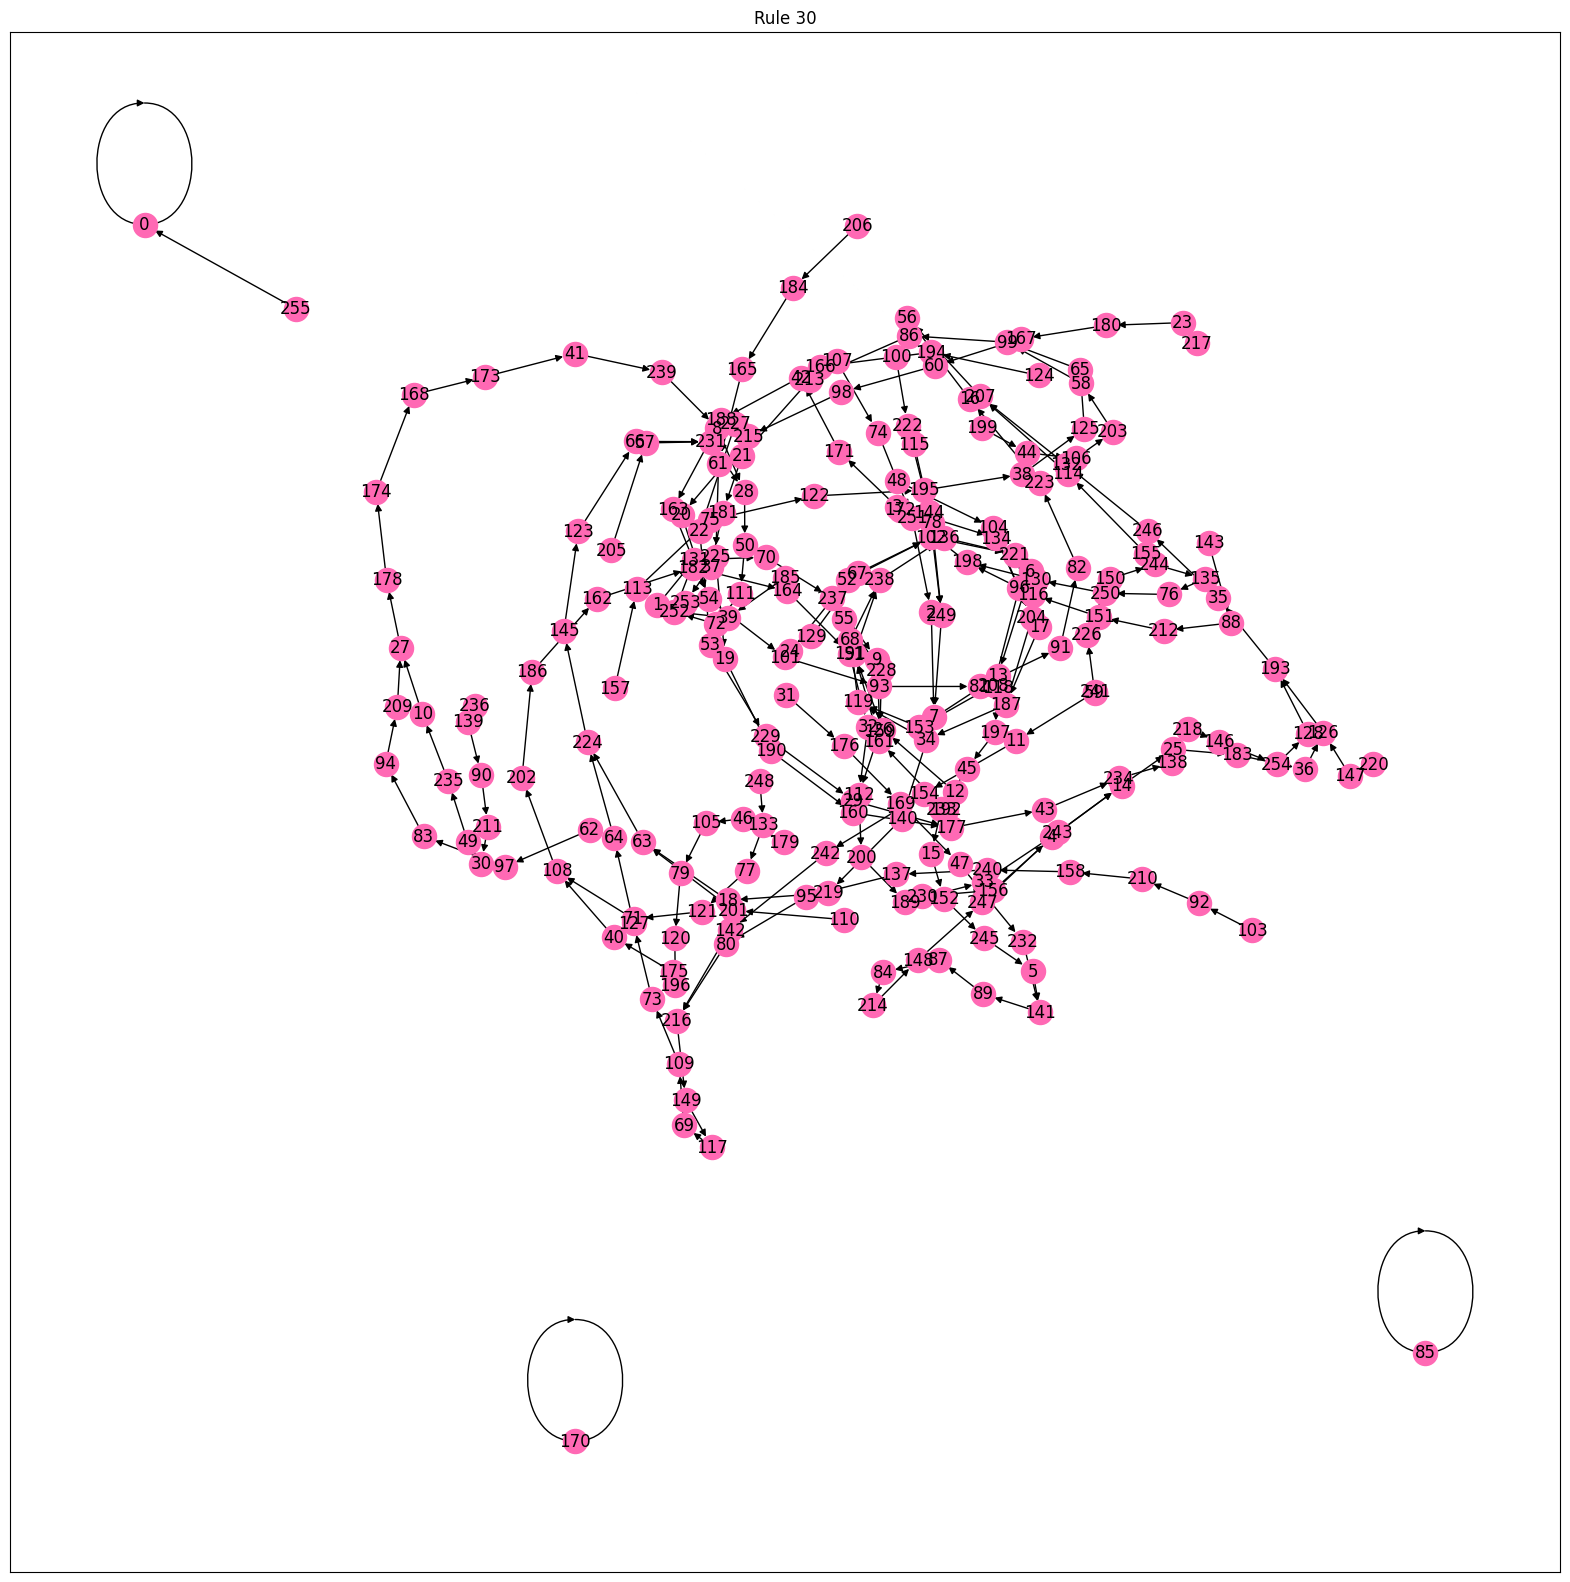

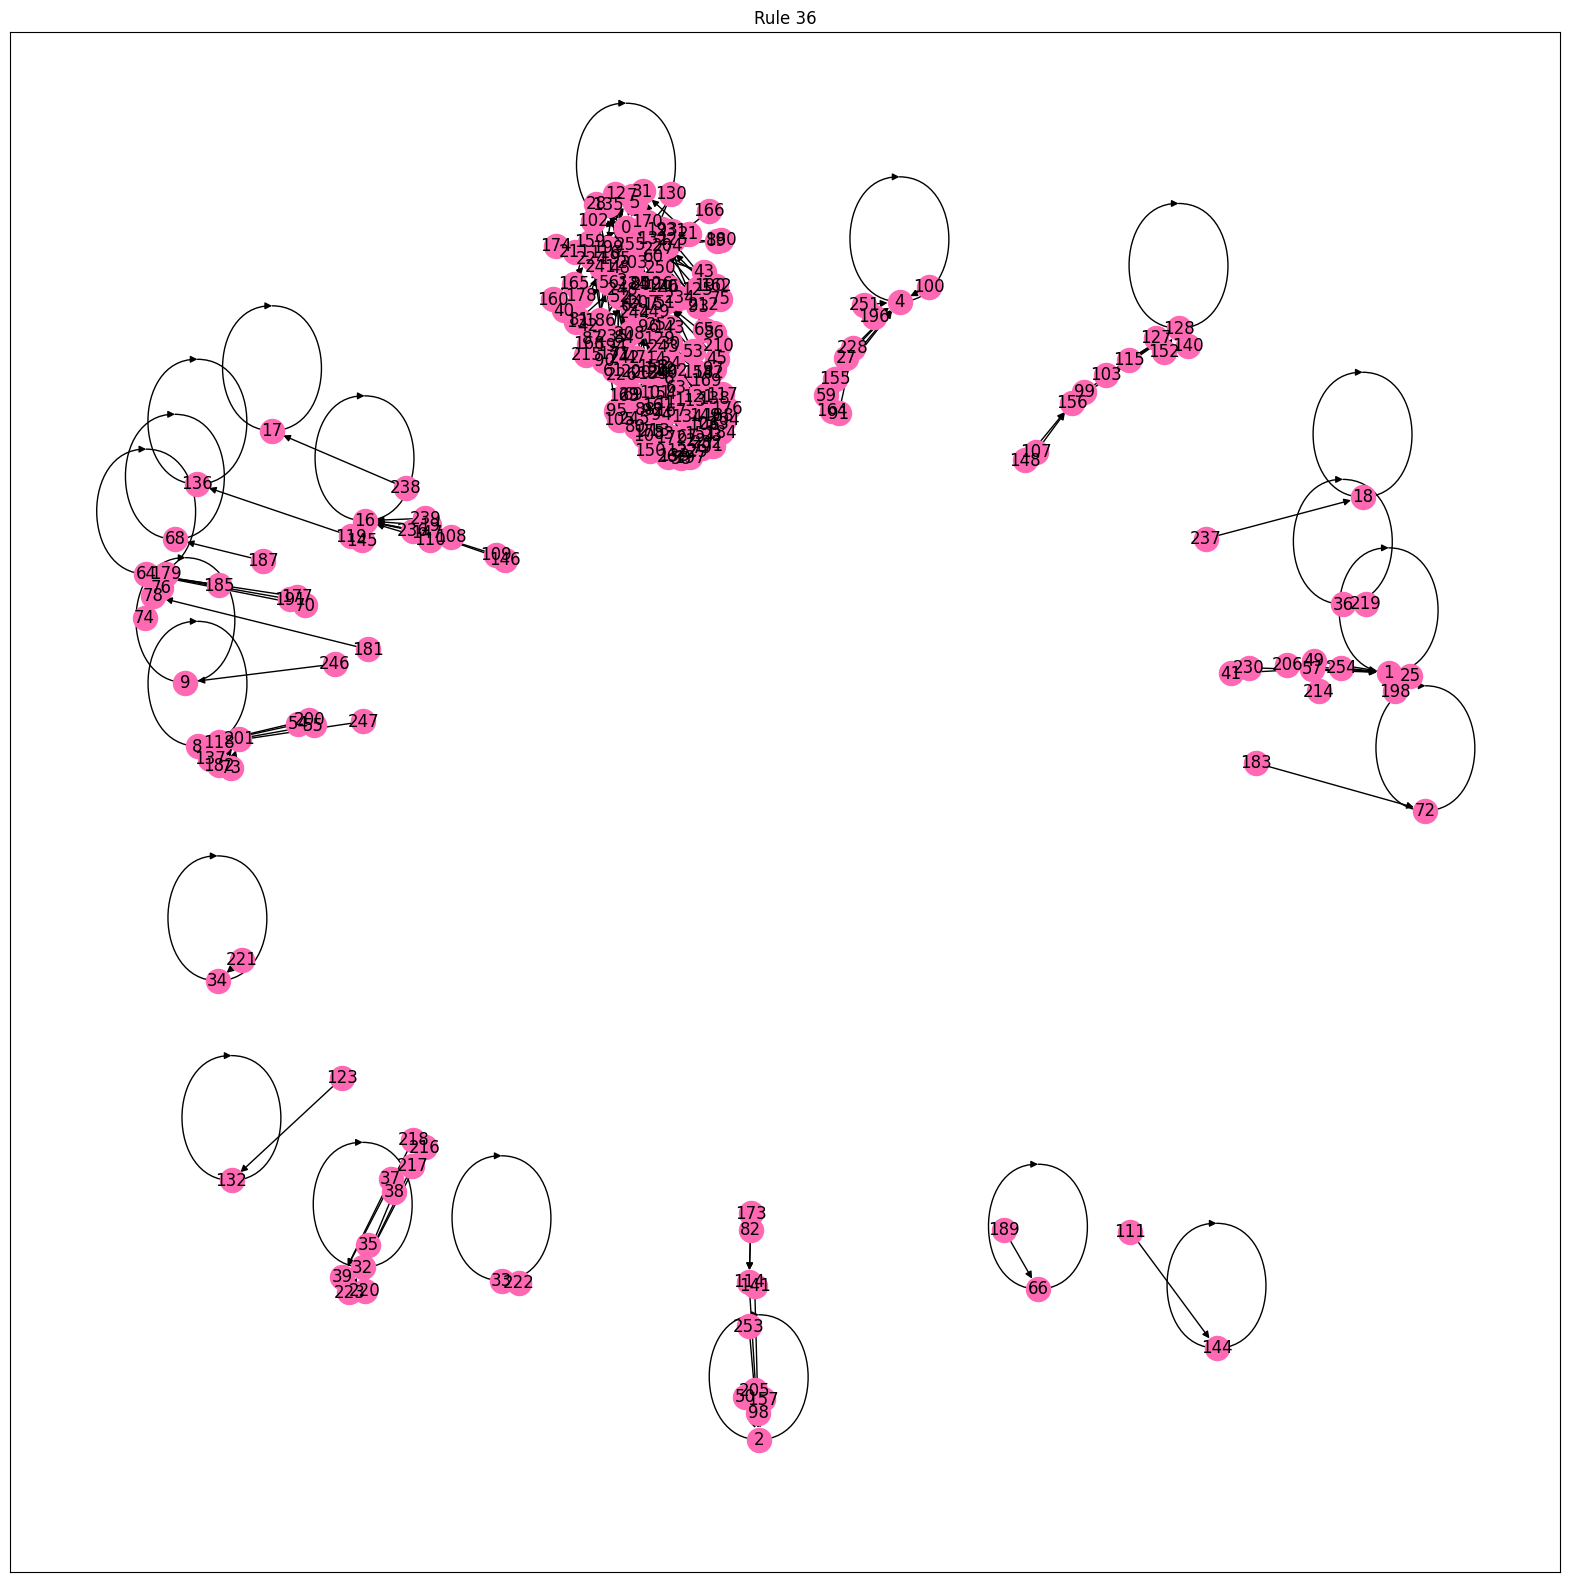

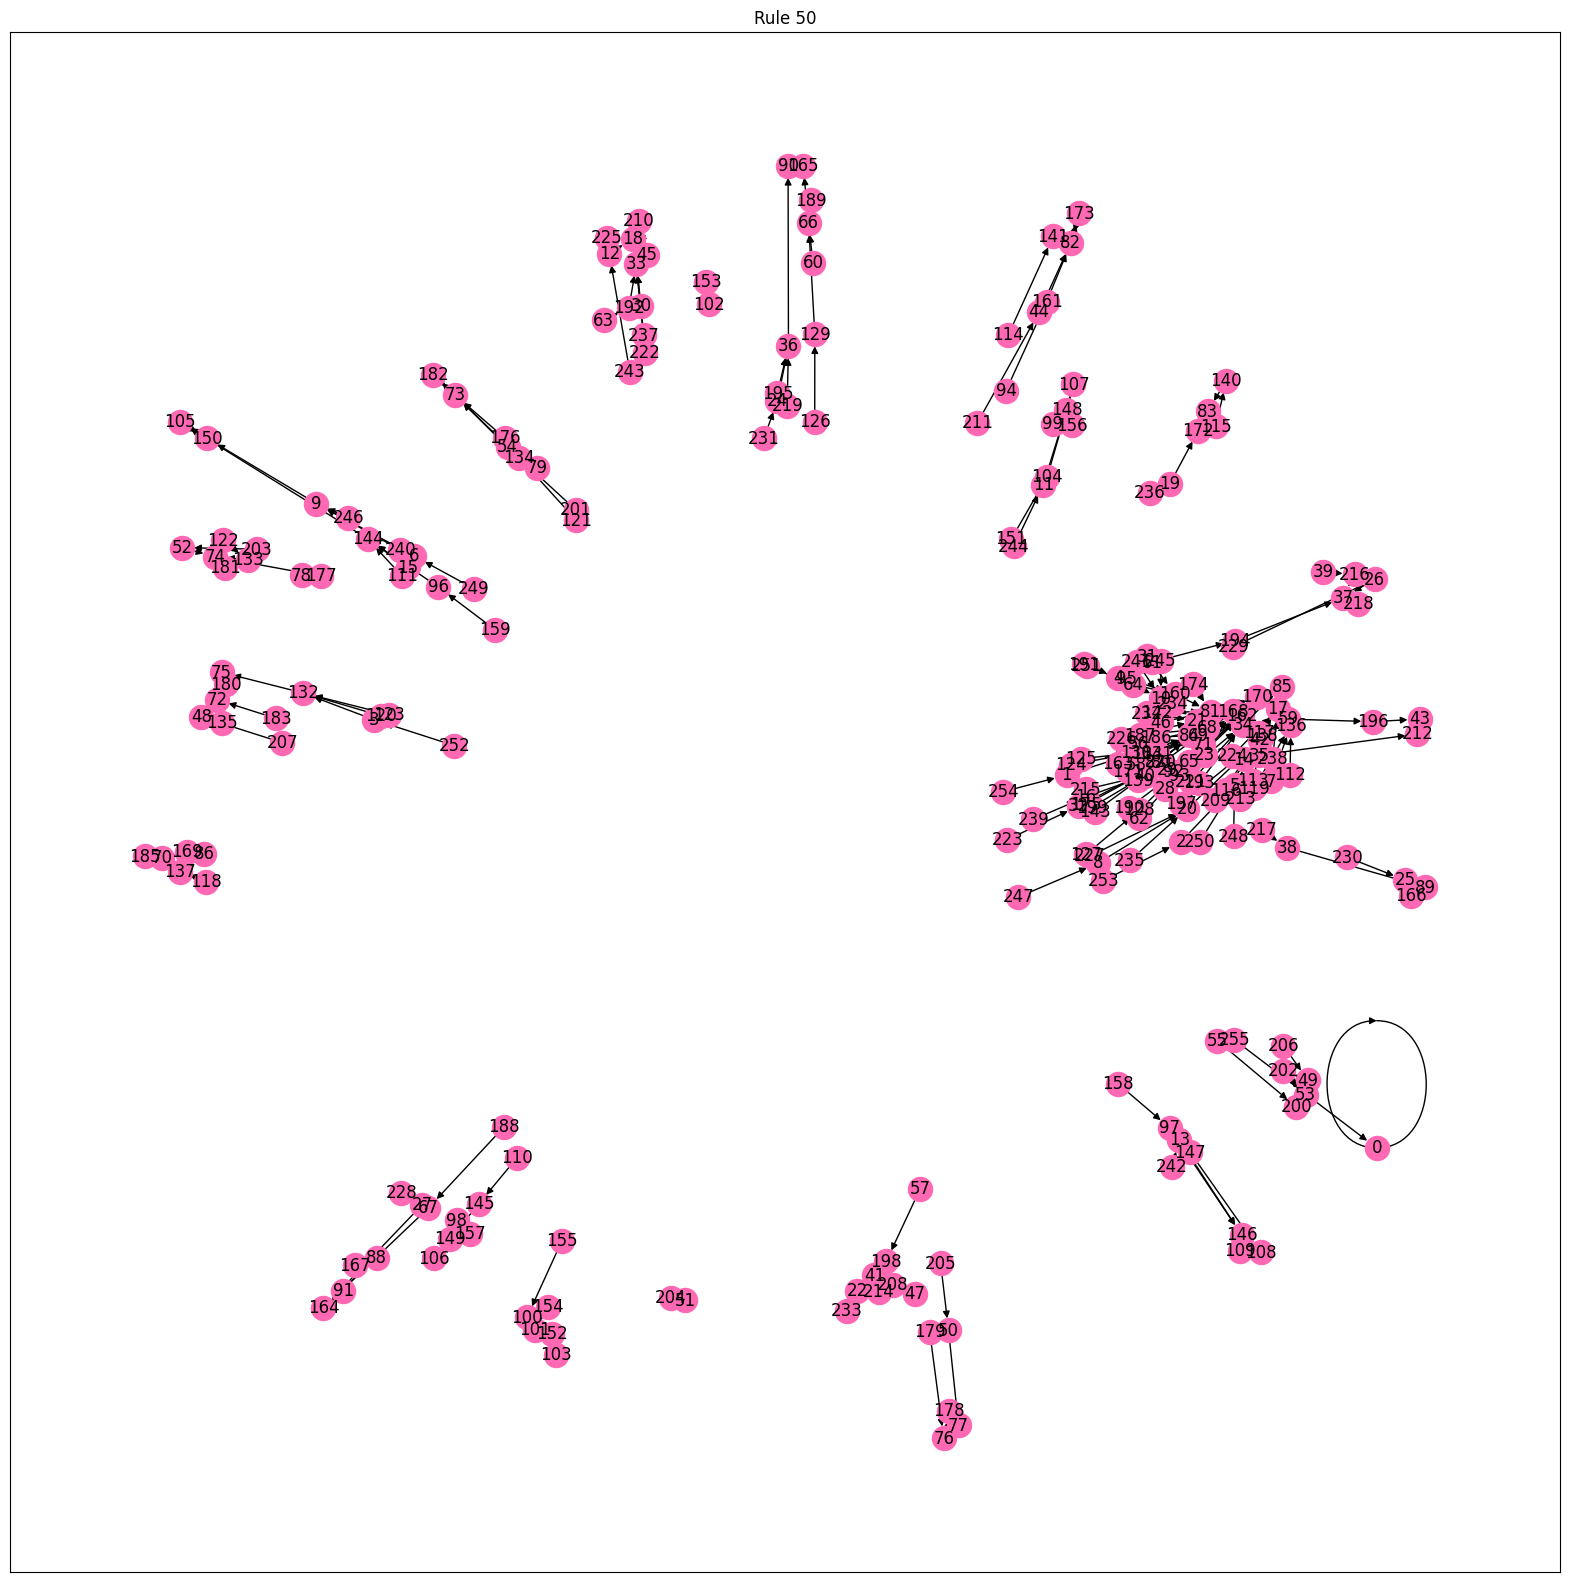

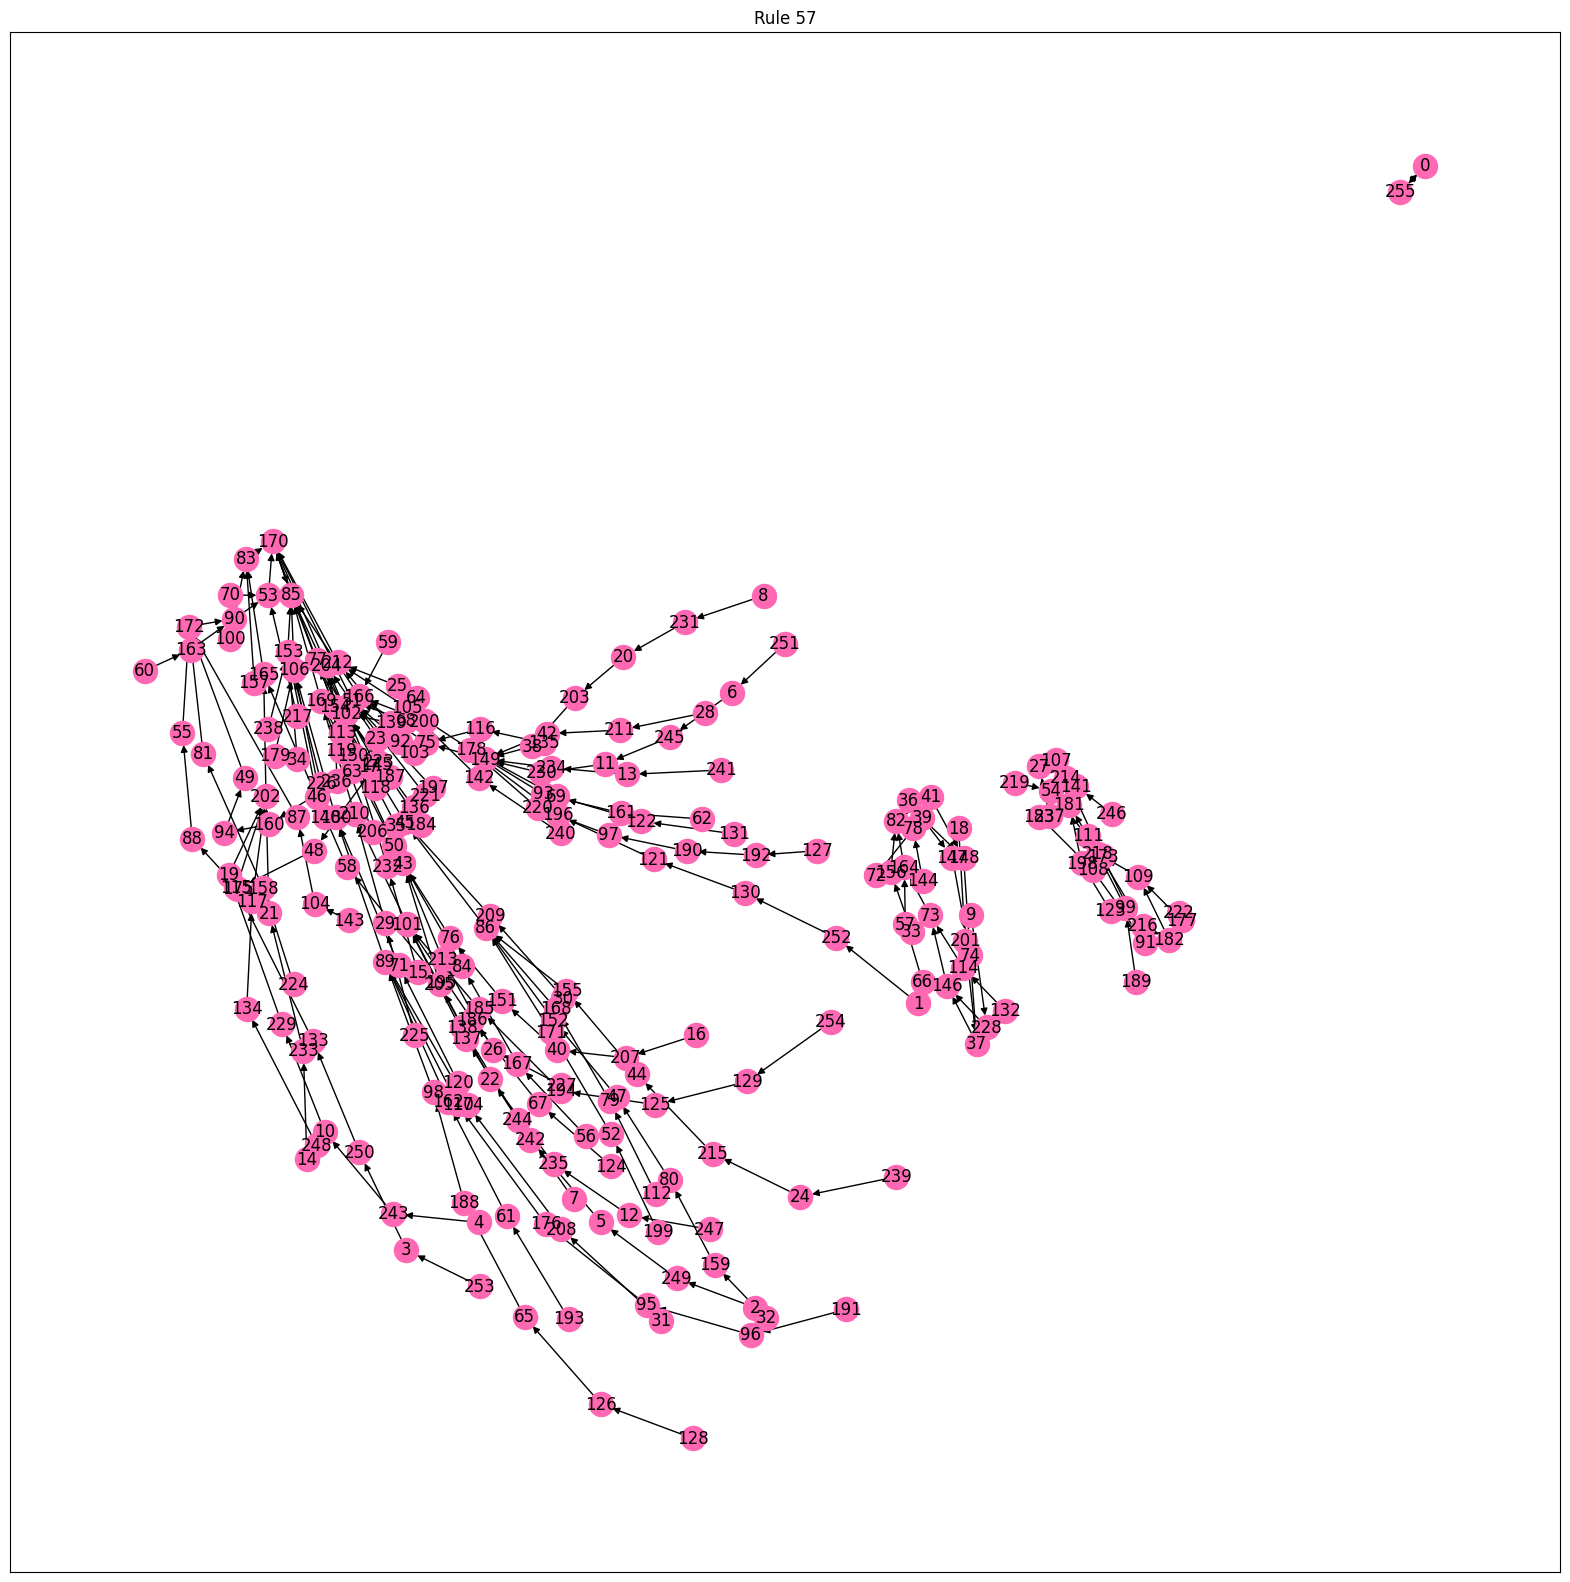

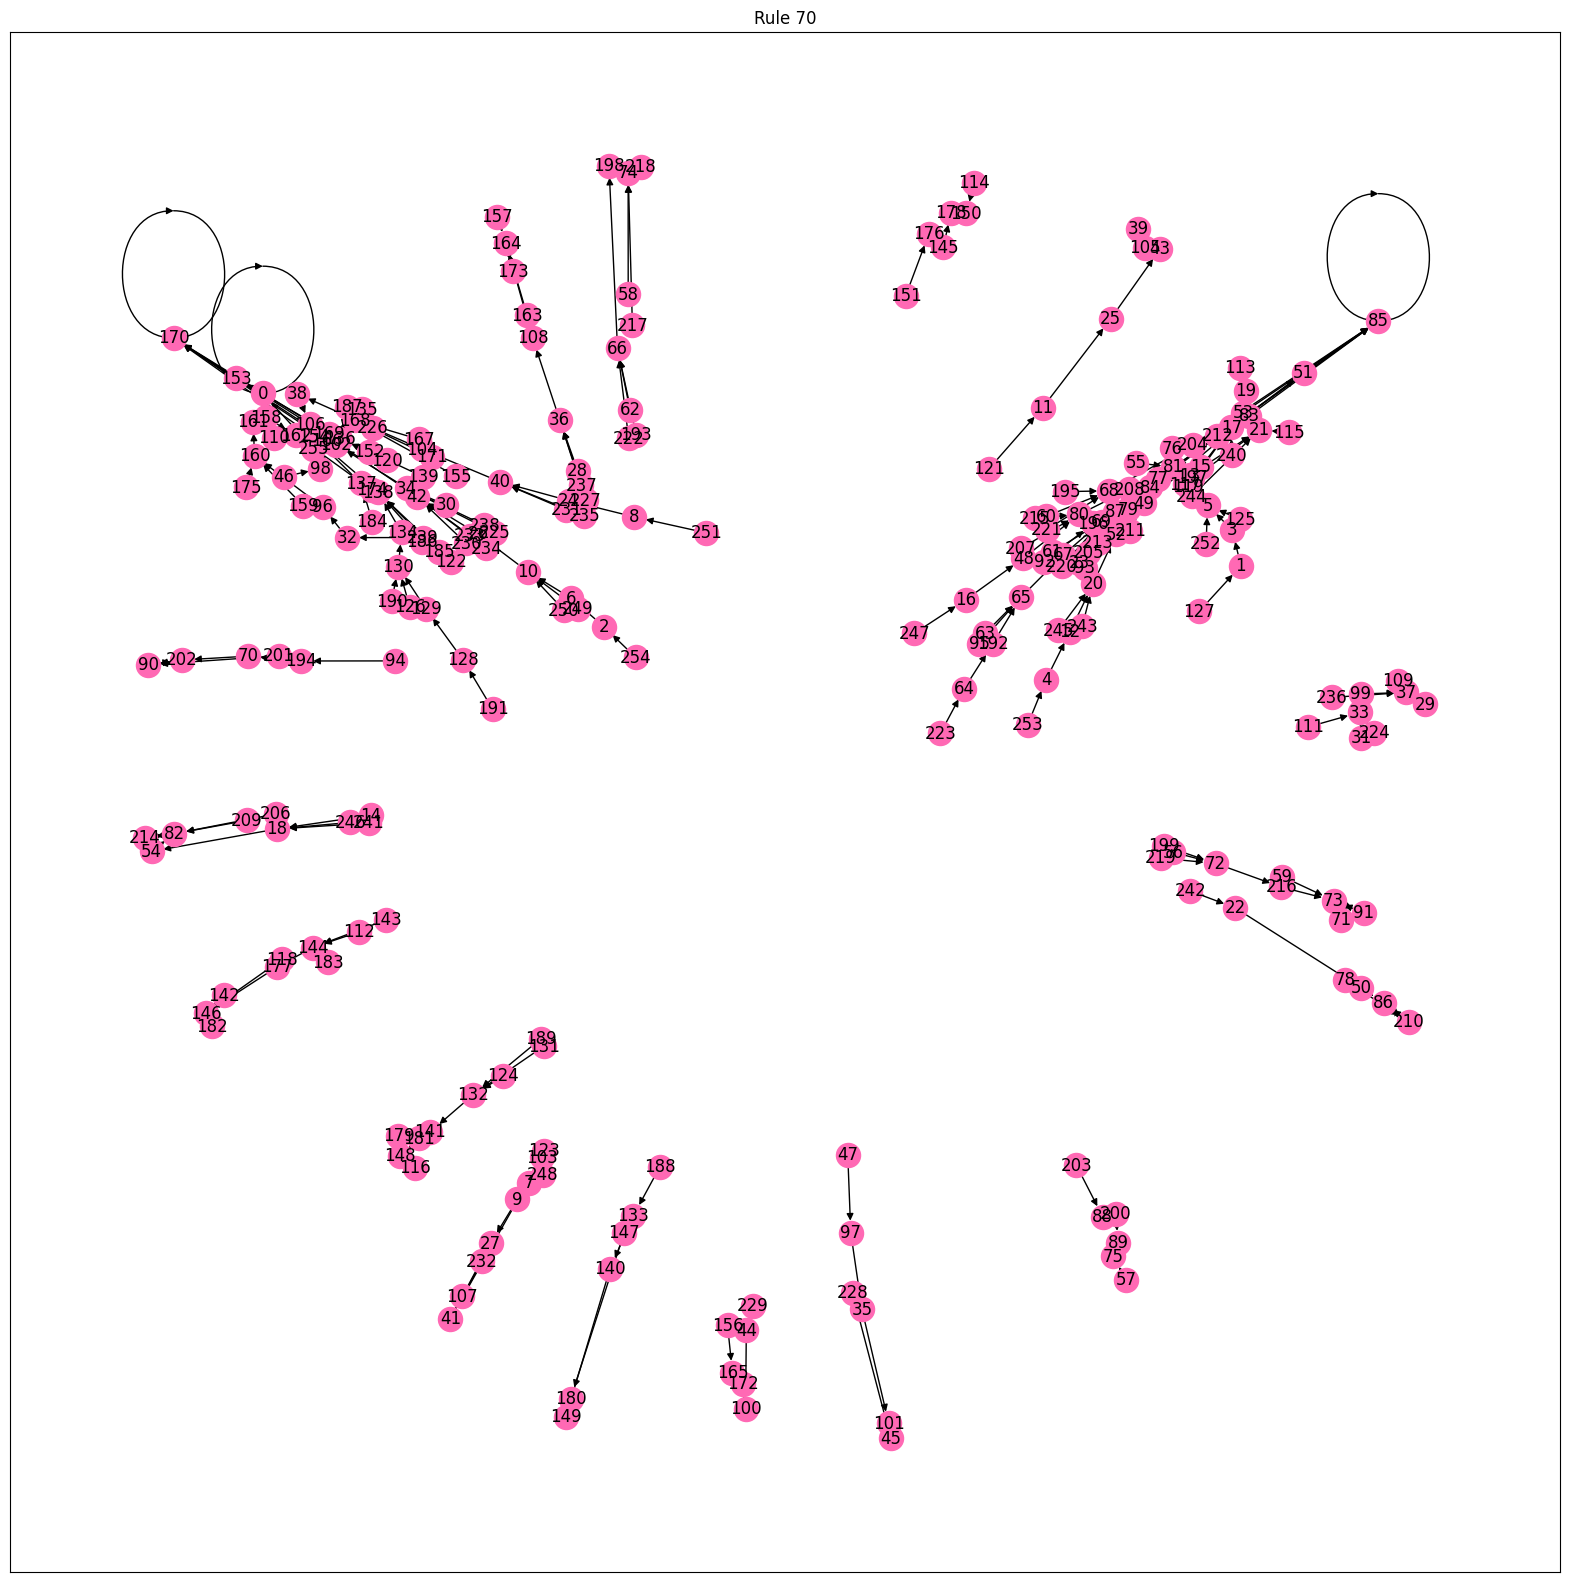

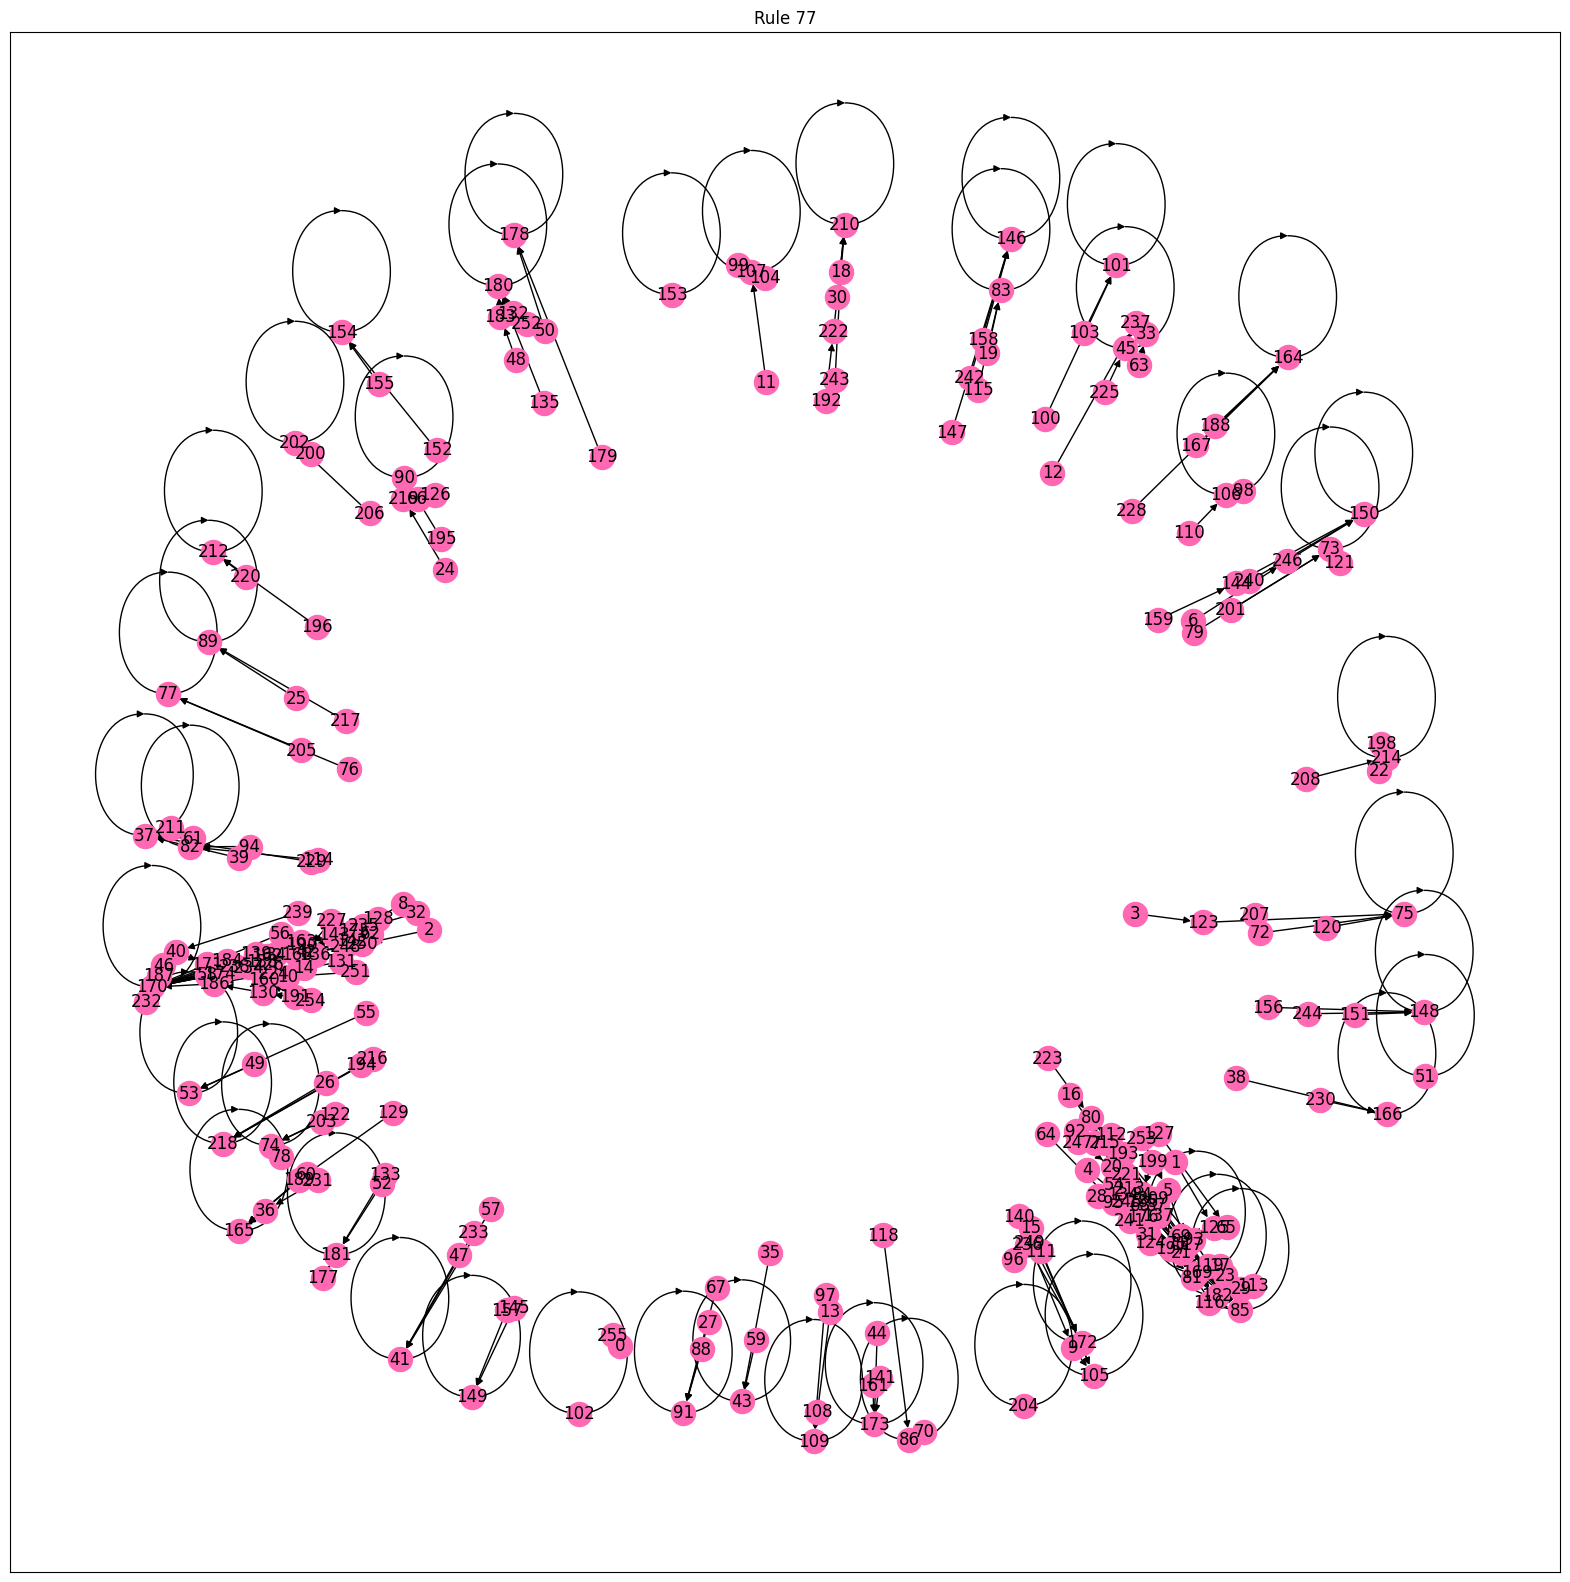

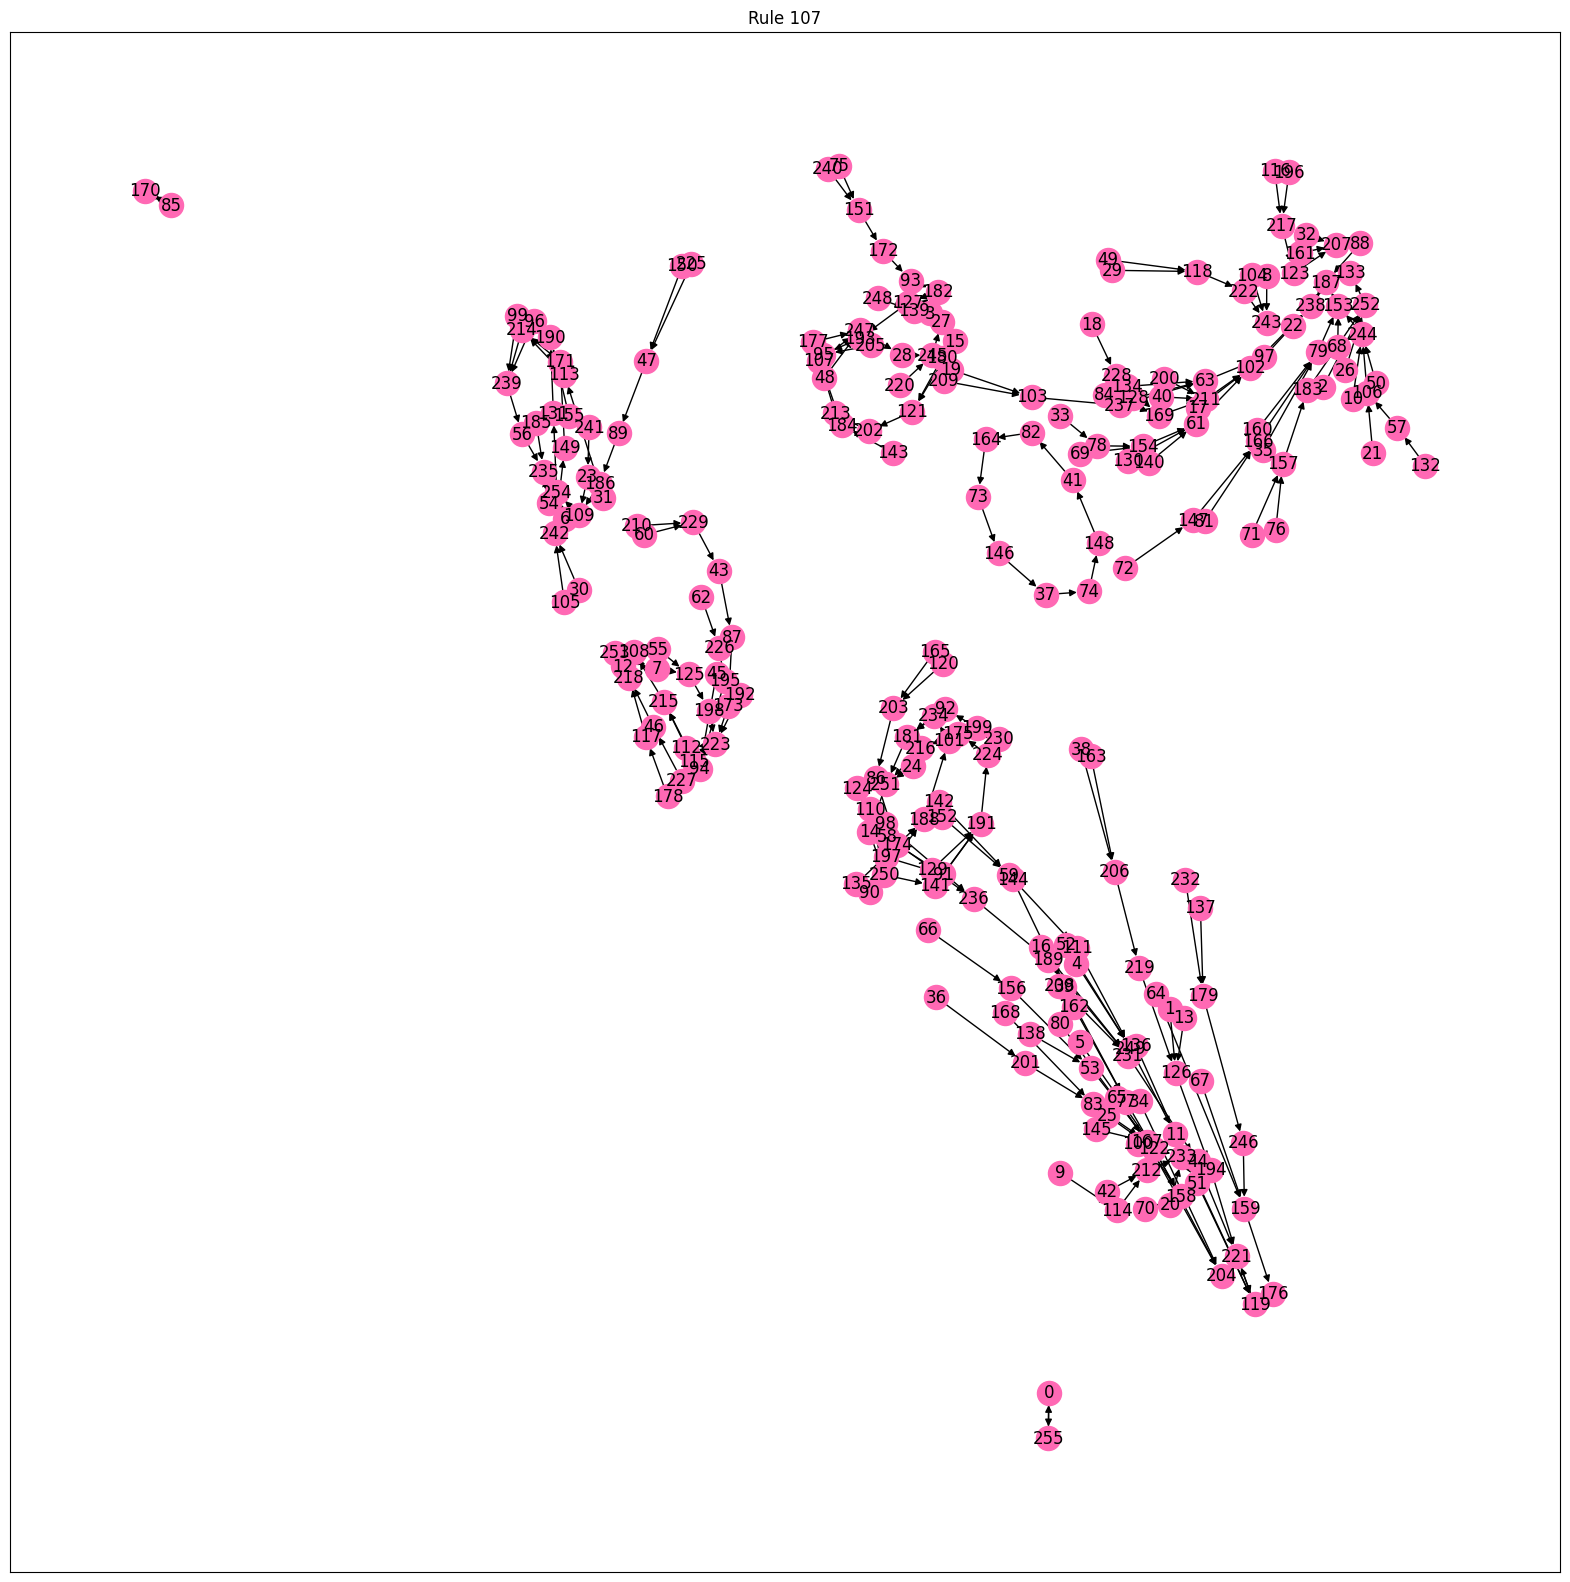

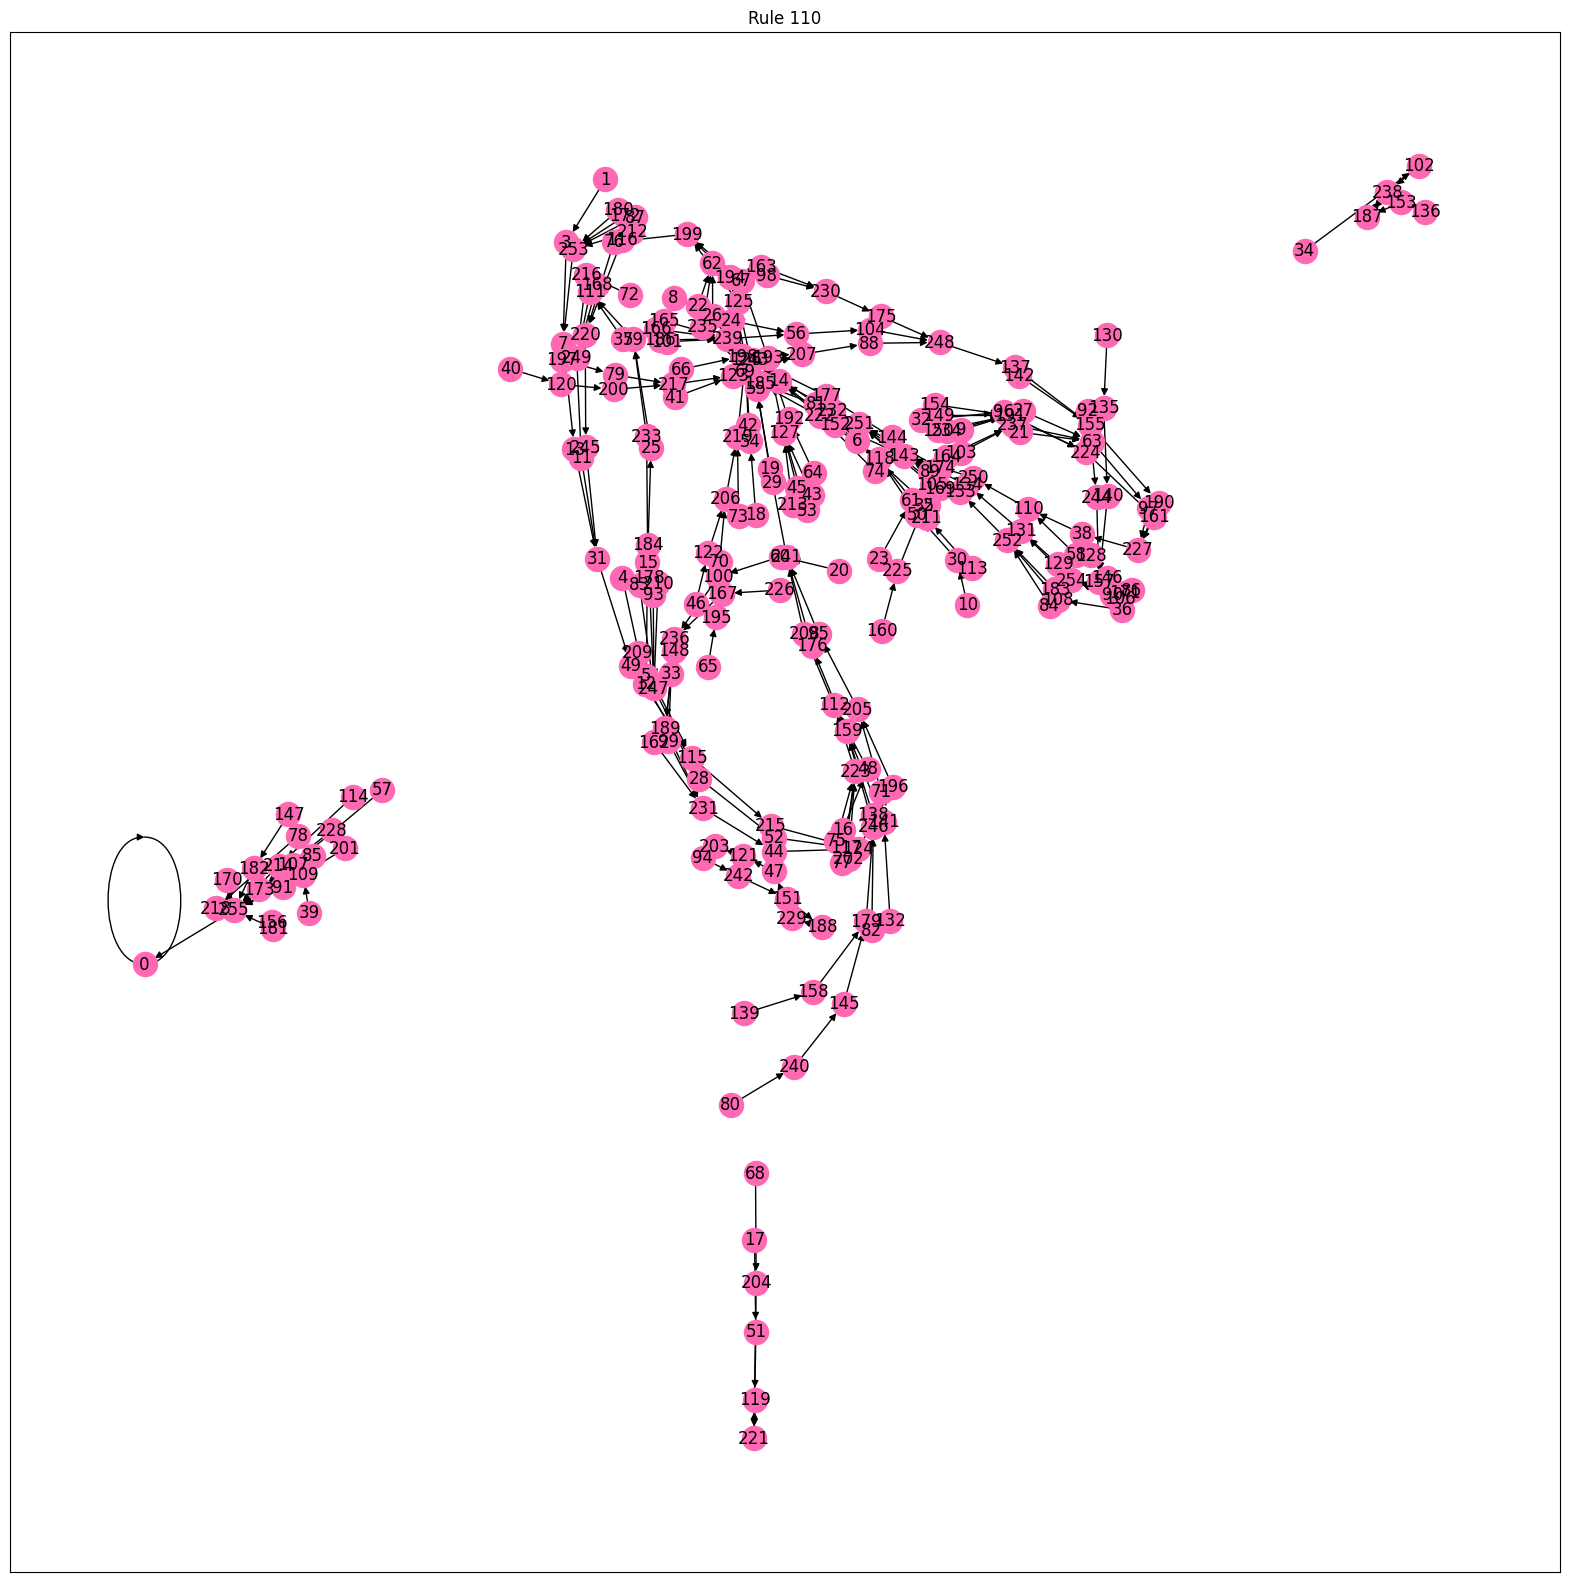

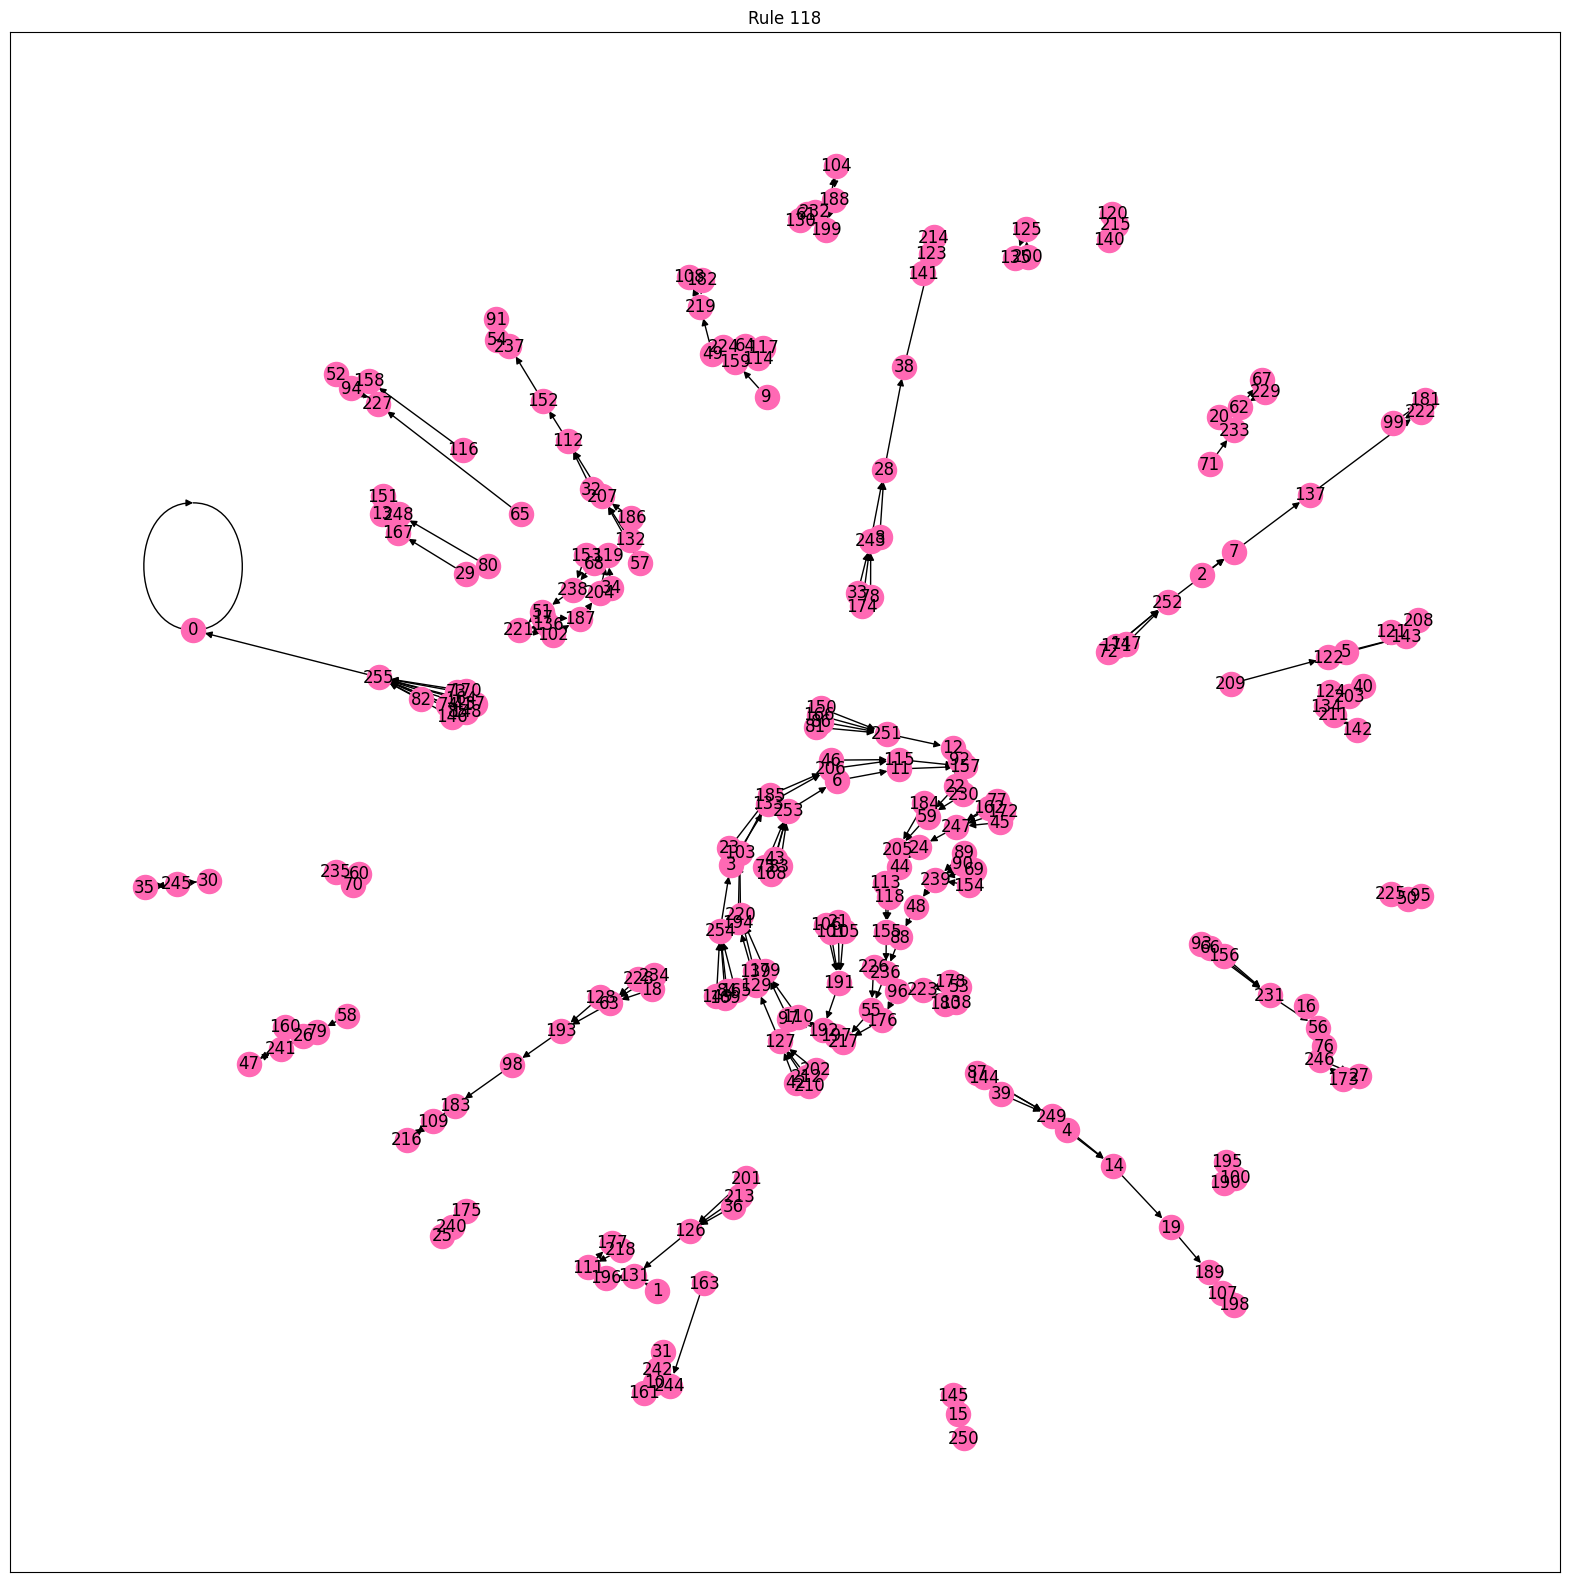

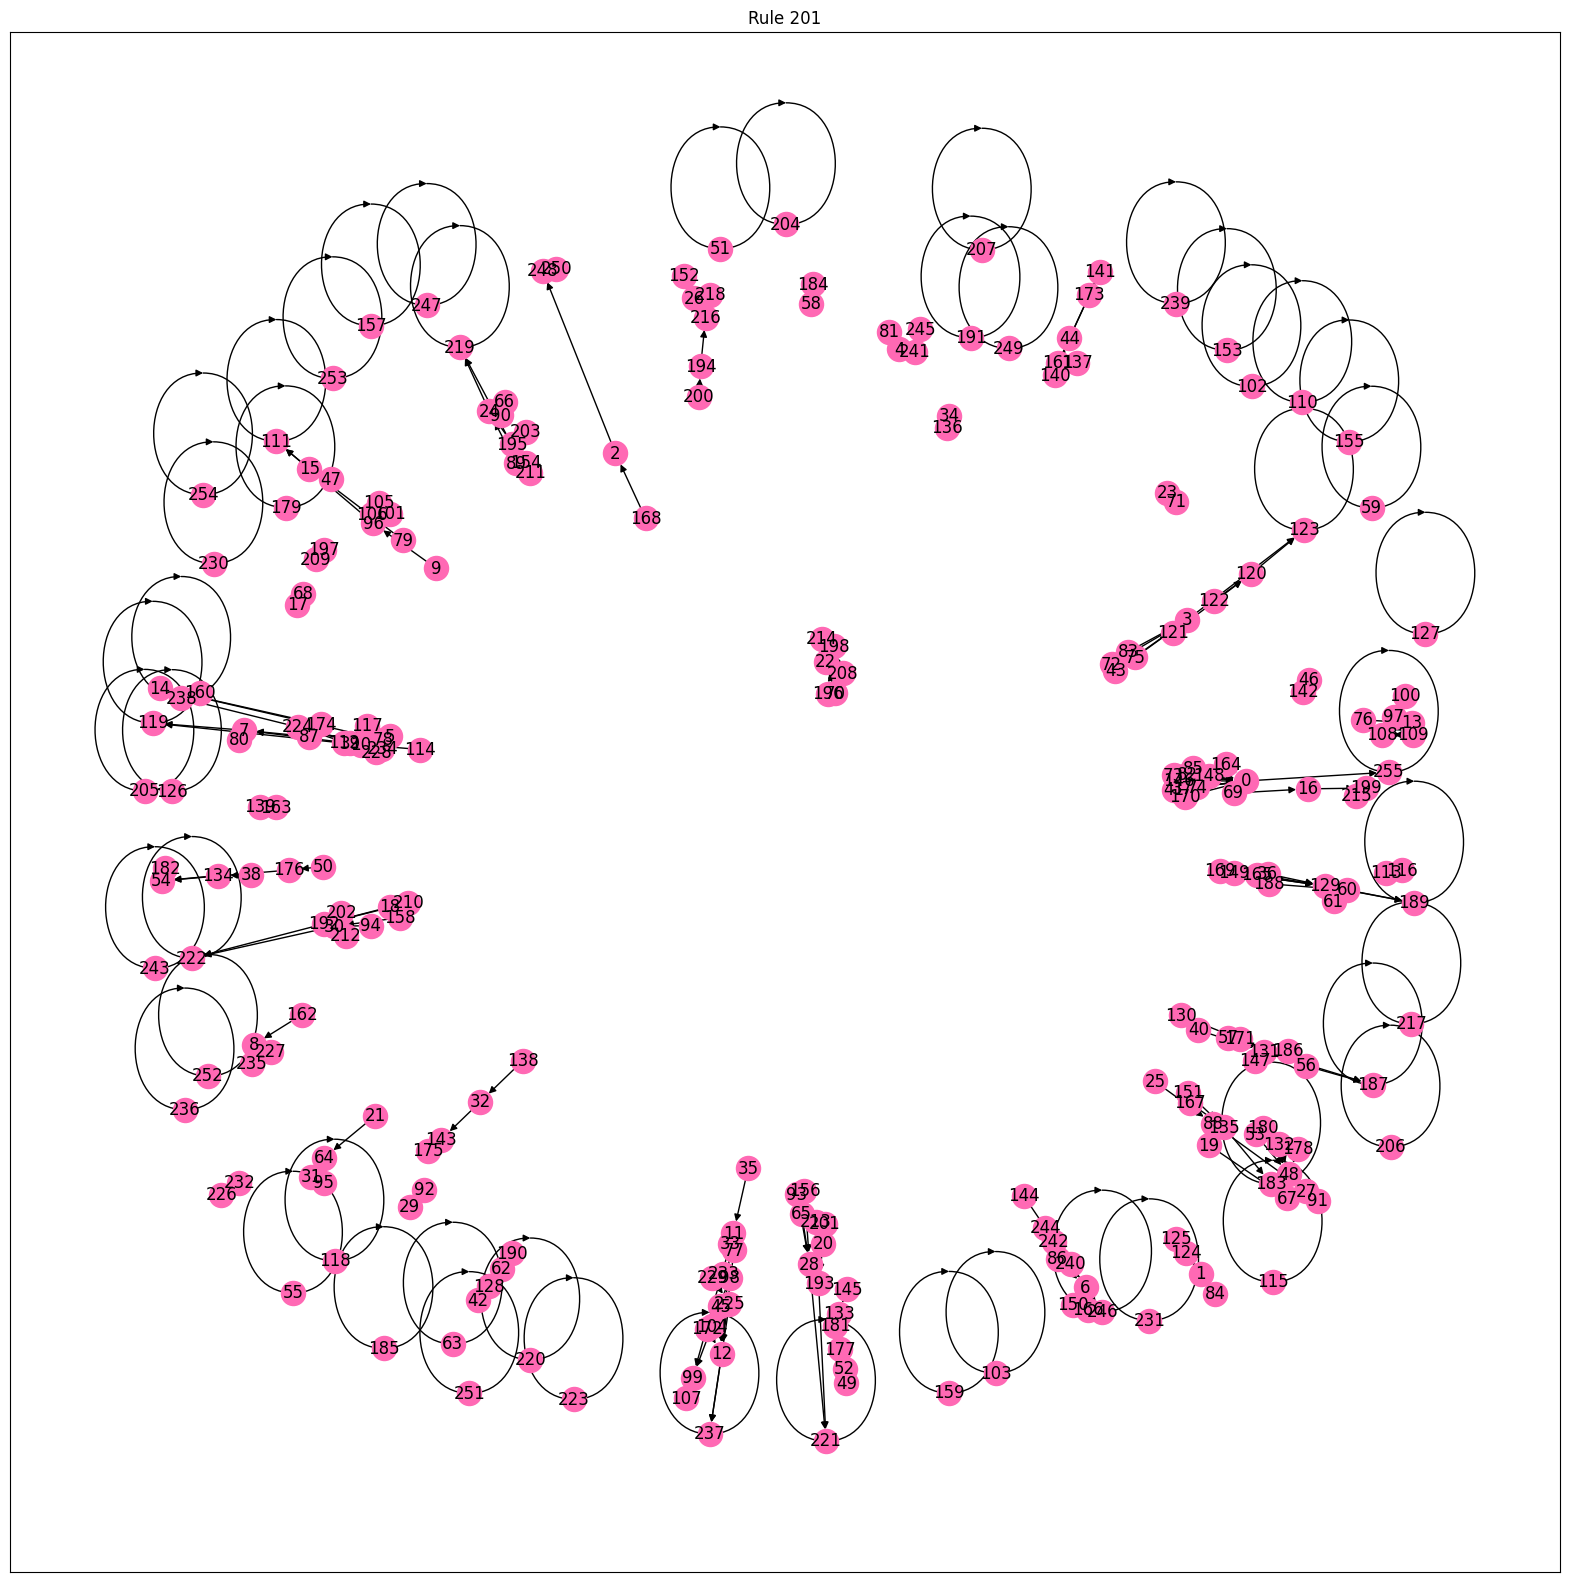

In [38]:
for rule in rules:
    make_graph(rule)